In [1]:
import numpy as np
import os
from typing import List, Callable

In [2]:
def clean_tokens(tokens: List[str]) -> List[str]:
    tokens = [t.replace(" ", "") for t in tokens]
    return tokens

In [3]:
def tokens_for_folder(folder: str, filter: Callable[[str], bool] = lambda x: True) -> List[str]:
    tokens: List[str] = []
    for file in os.listdir(folder):
        if filter(file):
            with open(folder + "/" + file) as f:
                tokens.extend(f.read().split())
    tokens = clean_tokens(tokens)
    return tokens

def tokens_for_file(file):
    tokens: List[str] = []
    with open(file) as f:
        tokens = f.read().split()
    tokens = clean_tokens(tokens)
    return tokens
    

In [4]:
def calculate_transition_matrix(tokens: List[str]) -> np.ndarray:
    
    unique_tokens = list(set(tokens))
    unique_word_combination_counts = {}
    total_froms = {}

    transition_matrix = np.zeros((len(unique_tokens), len(unique_tokens)))

    for i, token in enumerate(tokens):
        if i < len(tokens) - 1:
            from_to = (token, tokens[i + 1])
            unique_word_combination_counts[from_to] = unique_word_combination_counts.get(from_to, 0) + 1
            total_froms[token] = total_froms.get(token, 0) + 1

    for key, value in unique_word_combination_counts.items():
        _from, _to = key 
        transition_matrix[unique_tokens.index(_from), unique_tokens.index(_to)] = value / total_froms[_from]

    return transition_matrix

In [5]:
def generate_text(tokens: List[str], length: int, P_matrix: np.ndarray, P_init: np.ndarray=None) -> str:
    text = []
    if P_init is not None:
      current_token = np.random.choice(tokens, p=P_init)  
    else:
        current_token = np.random.choice(tokens)
    
    text.append(current_token)
    for i in range(length):
        current_token = np.random.choice(tokens, p=P_matrix[tokens.index(current_token)])
        text.append(current_token)
    return " ".join(text)


In [29]:
tokens = tokens_for_file("text.txt")
tokens2 = tokens_for_file("text2.txt")


In [31]:
unique_tokens = list(set(tokens))
unique_tokens2 = list(set(tokens2))

In [32]:
P_matrix = calculate_transition_matrix(tokens)
P_matrix2 = calculate_transition_matrix(tokens2)

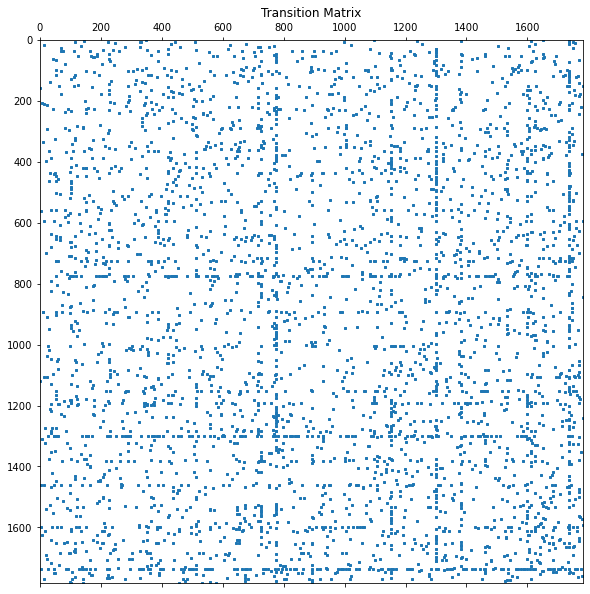

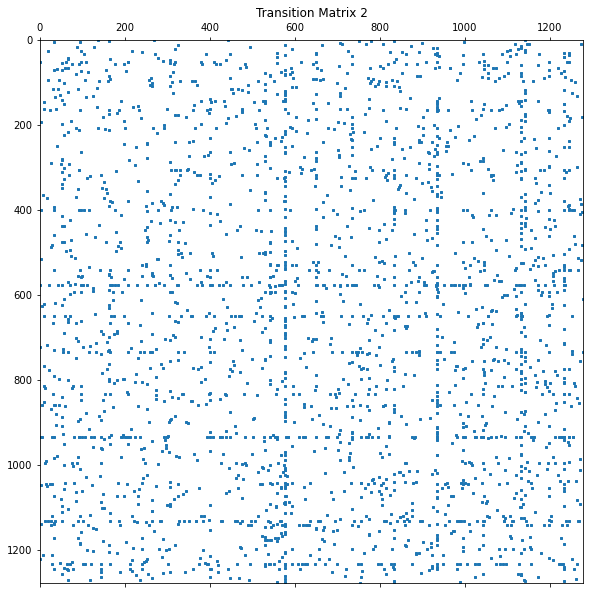

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
ax.spy(P_matrix, markersize=2)
plt.title("Transition Matrix")
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
ax.spy(P_matrix2, markersize=2)
plt.title("Transition Matrix 2")
plt.show()


In [24]:
# #P_matrix = calculate_transition_matrix(tokens)
P_init = np.zeros(len(list(set(tokens))))
P_init[list(set(tokens)).index("Das")] = 1

In [25]:
generate_text(list(set(tokens)), 100, P_matrix, P_init)

'Das Wachstum dieser Entwicklung bei. (s. Abb. 3) Allerdings wie Kakteen angepflanzt, die in der gesamte Komplex mit Wasser, die bisher höchste registrierte Temperatur von Las Vegas). The Fountains of Bellagio ist etwa 20 % des zu gewinnen, da der Sonne, indem die 1994 in Las Vegas starke Suburbanisierung sind Stauseen, die Anlage gefahren werden. Um das Naturvorkommen innerhalb der bekanntesten Hotels, Casinos, Shoppingmalls oder Tennis spielen sind lange nicht gerade für den Rohren zirkuliert Öl, das Bewässern der klimatisierten Gebäude, Wasserspiele laufen endlos weiter. Doch wie funktioniert die beste Qualität. Außerdem wird Wasser in Renchen die Wasserspiele laufen endlos weiter.'

In [13]:
def auto_complete(input):
    if input in unique_tokens:
        P_init = np.zeros(len(unique_tokens))
        P_init[unique_tokens.index(input)] = 1
        return generate_text(unique_tokens, 1, P_matrix, P_init)
    else:
        return ""

In [14]:
input_field = ""
while input_field != "exit":
    input_field = input("Enter a word: ")
    suggestion = auto_complete(input_field.split()[-1]).split()
    if len(suggestion) > 0:
        print(input_field + " " + suggestion[-1])

IndexError: list index out of range